# COGS 108 - Final Project 

# Overview

Yelp reviews can be an important tool for a parks and recreation agency in understanding where their parks are successful and where improvements can be made. However, when it comes time to make decisions regarding the allocation of funds, unprocessed Yelp reviews do little for decision making. Data science can help agencies turn the raw and anecdotal data of Yelp into a more quantitative gauge of public interest in their parks.

# Name & GitHub ID

- Name: Ryan Posey
- GitHub Username: rmposey

# Research Question

What qualities, attractions, or components of a park do visitors value most? Using natural language procecssing techniques on a sample of Yelp reviews, I will attempt to determine what aspects of San Diego parks made visits worthwhile to citizens and tourists.

## Background and Prior Work

Parks and recreation departments are only beginning to embrace the power of data science to solve problems and make decisions. Outlining the possibilities of using data is a presentation from the Nation Recreation and Parks Association(NRPA) entitled "Using Data at Park and Recreation Agencies" It notes that while many Parks directors agree that the role in analyzing data in order to drive decisions is important, there are still many bureaucratic challenges that limit access to data. The study shows that among the most important uses for data analytics in the Parks sector are the monitoring of "facility usage", "program performance", and "capital investment decisions". using Yelp review data could prove to be a useful tool in measuring the public's interest in parks, whether it may 

An article from Buro Happold, a site created by engineers and designers, focuses on how big data can shape the future of parks. They delve into the use of GPS data from social media companies in order to create the parks of the future. While this may be an appealing idea and may provide a lot of data, I believe this brings the operation into an ethical grey area and would avoid using data like this at all costs. Since the users are not knowledgeable about the use of data for the purpose of improving parks(even if it is to create something positive), it should not be used for. this project. This is a controversial use of data that many users may not know they're giving away. In the eyes of many people, it is up to the government to put regulations on tech companies collecting massive amounts of data this way. So it would be a terrible look for a public agency to actually use such data. Even if the purpose is to help create nicer parks for people, it would set a dangerous precedent for the Parks and Recreation Department to use data in this way(even if security agencies are likely doing so already).


Using Yelp data could prove to be a useful tool in measuring the public's interest in parks, whether it is the overall ratings of parks in comparison with one another, or analysis of the specific text of the review. In this analysis, I attempt to do the latter, using NLP to gauge interest in specific aspects of parks in San Diego.


References:
- 1)https://www.nrpa.org/contentassets/f768428a39aa4035ae55b2aaff372617/data-analysis-park-and-recreation.pdf
- 2)https://www.burohappold.com/news/using-big-data-create-parks-public-spaces-people-love/

# Hypothesis


By analysing the Yelp review text of San Diego parks, I believe there will be apparent patterns in frequency of words and phrases associated with both positive and negative reviews.

# Dataset(s)

### SD Parks Yelp Reviews
- Dataset Name: `yelp_SD_reviews.csv`
- Link to the dataset: https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_reviews.csv
- Number of observations: 2332

This dataset contains actual text from 2332 Yelp reviews of parks and other attractions under the control of the San Diego Parks and Recreation department. It contains three columns of data: 'id'(name of park), 'rating'(out of 5, as left by user), and 'text'(the review itself).

# Setup

Import the necessary 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.collocations import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package punkt to /home/rmposey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rmposey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rmposey/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/rmposey/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/rmposey/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /home/rmposey/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

# Data Cleaning

### Step 1: Load the datasets into pandas dataframes

In [3]:
df_review = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_reviews.csv')
df_review

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."
...,...,...,...
2328,Petco Park,5,I have visited over 27 MLB Ballparks including...
2329,Ann D. L'Heureux Memorial Dog Park,4,No grass here but it's a great dog park. if yo...
2330,Ann D. L'Heureux Memorial Dog Park,3,"I love taking our cholate lab here, however, t..."
2331,Ann D. L'Heureux Memorial Dog Park,3,Pretty small dog park overall. The center of t...


### Step 2: Check the length of our reviews

In [4]:
df_review['length'] = df_review['text'].apply(len)

Plot the length of reviews categorized by the rating the review recieved. From these histograms we can immediately tell that there are a lot more four and five star reviews than there are in the one to three star range. Additionally, it seems that most reviews are around the length of 150 characters. 

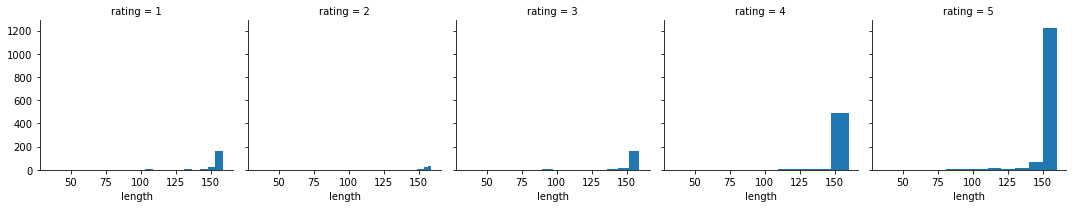

In [5]:
length_hist = sns.FacetGrid(df_review, col='rating')
length_hist.map(plt.hist, 'length')

### Step 3: Separate positive and negative reviews
We will put 4 and 5 star reviews in the positive dataframe and put 1, 2, and 3 star reviews in the negative dataframe. While 3 stars is not necessarily a completely negative review, that level of review shows that there is still room for improvement in that visitor's experience, so we will put in the negative category. 

In [6]:
df_pos = df_review[df_review['rating'] > 3]
df_neg = df_review[df_review['rating'] <= 3]

Reset the indices of our two new dataframes.

In [7]:
df_pos = df_pos.reset_index(drop = True)
df_neg = df_neg.reset_index(drop = True)

Convert all characters in the 'text' column to lowercase.

In [8]:
df_pos['text'] = df_pos['text'].str.lower()
df_neg['text'] = df_neg['text'].str.lower()

Remove punctuation from the 'text' column.

In [9]:
df_pos["text"] = df_pos['text'].str.replace('[^\w\s]','')
df_neg["text"] = df_neg['text'].str.replace('[^\w\s]','')
df_pos["text"] = df_pos['text'].str.replace('\n',' ')
df_neg["text"] = df_neg['text'].str.replace('\n',' ')

Tokenize the words in the 'text' columns and add them to two new lists.

In [10]:
pos_tokens = []
neg_tokens = []
for x in df_pos['text']:
    pos_tokens.extend(nltk.word_tokenize(x))
for x in df_neg['text']:
    neg_tokens.extend(nltk.word_tokenize(x))

Remove stopwords from positive and negative word lists.

In [11]:
stop_words = stopwords.words('english')
pos_counts = Counter(pos_tokens)
neg_counts = Counter(neg_tokens)
for stop in nltk.corpus.stopwords.words('english'):
    if stop in pos_counts:
        pos_counts.pop(stop) 
    if stop in neg_counts:
        neg_counts.pop(stop)

# Data Analysis & Results

## Term Frequency

First, let's take a look at the most common words that appear in the positive reviews.

In [12]:
pos_counts.most_common(30)

[('park', 602),
 ('great', 325),
 ('place', 301),
 ('san', 206),
 ('time', 191),
 ('nice', 185),
 ('diego', 182),
 ('one', 181),
 ('love', 174),
 ('little', 147),
 ('area', 141),
 ('get', 134),
 ('beach', 127),
 ('beautiful', 126),
 ('good', 126),
 ('parking', 123),
 ('ive', 111),
 ('well', 110),
 ('really', 109),
 ('dog', 107),
 ('years', 107),
 ('like', 105),
 ('go', 105),
 ('first', 102),
 ('best', 99),
 ('kids', 96),
 ('people', 95),
 ('walk', 94),
 ('lot', 94),
 ('covid', 93)]

Next, let's do the same thing for the negative reviews.

In [13]:
neg_counts.most_common(30)

[('park', 156),
 ('place', 64),
 ('nice', 45),
 ('dog', 45),
 ('time', 42),
 ('one', 41),
 ('good', 36),
 ('great', 34),
 ('like', 33),
 ('years', 31),
 ('area', 30),
 ('2', 30),
 ('parking', 29),
 ('people', 29),
 ('first', 27),
 ('lived', 27),
 ('dont', 25),
 ('really', 25),
 ('little', 24),
 ('review', 24),
 ('get', 24),
 ('san', 24),
 ('lot', 24),
 ('management', 24),
 ('many', 24),
 ('small', 23),
 ('well', 22),
 ('come', 22),
 ('even', 22),
 ('kids', 21)]

While it's nice that people think that the parks are "amazing" and "beautiful," in a review that we already know is positve, these types of terms are effectively stop words. I will remove some of the these words from our lists, so that we can more easily see the elements from the park that are important to visitors.I will create a list of words that appear frequenlty in both lists, and then remove them from the positive and negative lists. Then we'll take a look at the frequencies again.

In [28]:
freq_words = ['park','get','city','also','san','diego', 'went','see','around','ever','lived','years','like','great',
              'good','place','nice','time','one','fun','come','im','many','best','love','beautiful','ive','well',
              'really','amazing','always','lots','take','lot','go','came','since','back','going','right','us','review',
             'spot','dont','times','much']
for word in freq_words:
    if word in pos_counts:
        pos_counts.pop(word)
    if word in neg_counts:
        neg_counts.pop(word)

In [29]:
pos_counts.most_common(30)

[('little', 147),
 ('area', 141),
 ('beach', 127),
 ('parking', 123),
 ('dog', 107),
 ('first', 102),
 ('kids', 96),
 ('people', 95),
 ('walk', 94),
 ('covid', 93),
 ('play', 88),
 ('trail', 86),
 ('day', 85),
 ('family', 81),
 ('small', 75),
 ('clean', 72),
 ('playground', 71),
 ('hike', 67),
 ('experience', 63),
 ('neighborhood', 61),
 ('friendly', 60),
 ('food', 59),
 ('theres', 58),
 ('find', 58),
 ('easy', 58),
 ('service', 58),
 ('old', 57),
 ('home', 57),
 ('open', 55),
 ('found', 55)]

In [30]:
neg_counts.most_common(30)

[('dog', 45),
 ('area', 30),
 ('2', 30),
 ('parking', 29),
 ('people', 29),
 ('first', 27),
 ('little', 24),
 ('management', 24),
 ('small', 23),
 ('even', 22),
 ('kids', 21),
 ('would', 21),
 ('property', 21),
 ('trail', 20),
 ('large', 17),
 ('cant', 17),
 ('open', 16),
 ('used', 16),
 ('play', 16),
 ('playground', 15),
 ('never', 15),
 ('3', 15),
 ('service', 15),
 ('apartment', 14),
 ('theres', 14),
 ('bad', 14),
 ('homeless', 14),
 ('trails', 14),
 ('location', 14),
 ('moved', 14)]

These at a glance seem to be more useful than the first iteration of the most frequent words. Let's plot frequent words in positive reviews and take a look at the results

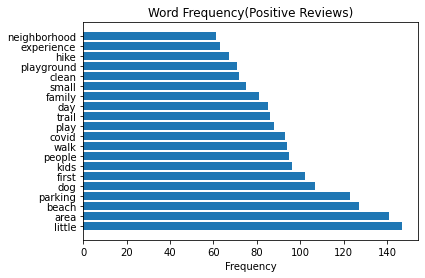

In [31]:
pos_top20 = pos_counts.most_common(20)
plt.barh([it[0] for it in pos_top20], [it[1] for it in pos_top20])
plt.title('Word Frequency(Positive Reviews)');
plt.xlabel('Frequency');

Plotting the 20 most frequent words in negative reviews

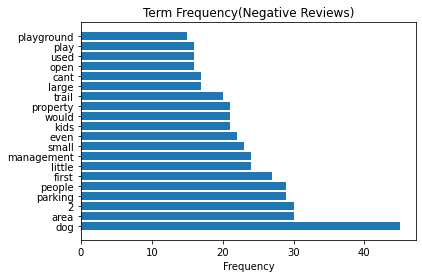

In [32]:
neg_top20 = neg_counts.most_common(20)
plt.barh([it[0] for it in neg_top20], [it[1] for it in neg_top20])
plt.title('Term Frequency(Negative Reviews)');
plt.xlabel('Frequency');

We can infer that some of the most important elements of a park have to do with frequently appearing terms like "playground", "dog", "parking", "trail", and "hike". These patterns can provide a jumping off point for future research into how these items are successful in some parks and how they can be improved in others.

## Frequency of 2 and 3 Word Combinations

Having seen what the frequency of single words in the review data looks like, let's now take a look at sets of two and three words that frequently appear in conjunction with one another using the nltk.collocations package.

In [33]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

Frequent word pairings in positive reviews

In [34]:
finder = BigramCollocationFinder.from_words(pos_tokens)
finder.apply_freq_filter(3)
print(finder.nbest(bigram_measures.pmi, 25))

[('shake', 'shack'), ('bowling', 'alley'), ('trash', 'cans'), ('bob', 'hope'), ('gaslamp', 'quarter'), ('jury', 'duty'), ('united', 'states'), ('pleasantly', 'surprised'), ('real', 'estate'), ('lets', 'face'), ('stumbled', 'upon'), ('businesses', 'operating'), ('wood', 'chips'), ('double', 'peak'), ('bankers', 'hill'), ('chula', 'vista'), ('normal', 'heights'), ('torrey', 'pines'), ('tap', 'room'), ('mira', 'mesa'), ('fresh', 'air'), ('extra', 'mile'), ('manager', 'melissa'), ('sunset', 'cliffs'), ('swing', 'set')]


Frequent 3-word phrases in positive reviews

In [35]:
finder2 = TrigramCollocationFinder.from_words(pos_tokens)
finder2.apply_freq_filter(5)
print(finder2.nbest(trigram_measures.pmi, 25))

[('price', 'of', 'admission'), ('will', 'definitely', 'be'), ('above', 'and', 'beyond'), ('i', 'cant', 'believe'), ('i', 'highly', 'recommend'), ('hidden', 'gem', 'in'), ('in', 'la', 'jolla'), ('worth', 'the', 'price'), ('san', 'diego', 'county'), ('my', 'favorite', 'places'), ('a', 'hidden', 'gem'), ('if', 'you', 'want'), ('i', 'grew', 'up'), ('so', 'much', 'fun'), ('of', 'la', 'jolla'), ('love', 'coming', 'here'), ('hard', 'to', 'find'), ('of', 'san', 'diegos'), ('been', 'coming', 'here'), ('as', 'well', 'as'), ('in', 'san', 'diego'), ('plenty', 'of', 'space'), ('right', 'next', 'to'), ('across', 'the', 'street'), ('due', 'to', 'covid')]


Frequent word pairings in negative reviews

In [36]:
finder3 = BigramCollocationFinder.from_words(neg_tokens)
finder3.apply_freq_filter(5)
print(finder3.nbest(bigram_measures.pmi, 25))

[('la', 'jolla'), ('san', 'diego'), ('ive', 'been'), ('property', 'management'), ('one', 'star'), ('if', 'youre'), ('years', 'ago'), ('parking', 'lot'), ('my', 'husband'), ('my', 'daughter'), ('you', 'want'), ('if', 'you'), ('so', 'many'), ('came', 'here'), ('lived', 'here'), ('plenty', 'of'), ('all', 'over'), ('would', 'be'), ('you', 'can'), ('come', 'here'), ('do', 'not'), ('lots', 'of'), ('we', 'were'), ('have', 'lived'), ('you', 'cant')]


Frequent 3-word phrases in negative reviews

In [37]:
finder4 = TrigramCollocationFinder.from_words(neg_tokens)
finder4.apply_freq_filter(5)
print(finder4.nbest(trigram_measures.pmi, 25))

[('if', 'you', 'want'), ('across', 'the', 'street'), ('in', 'san', 'diego'), ('plenty', 'of', 'parking'), ('lived', 'here', 'for'), ('used', 'to', 'be'), ('my', 'husband', 'and'), ('if', 'you', 'are'), ('the', 'parking', 'lot'), ('i', 'have', 'lived'), ('i', 'lived', 'here'), ('there', 'is', 'no'), ('husband', 'and', 'i'), ('a', 'lot', 'of'), ('this', 'place', 'is'), ('dog', 'park', 'is'), ('in', 'the', 'area'), ('this', 'park', 'is'), ('there', 'is', 'a'), ('to', 'this', 'park'), ('to', 'be', 'a'), ('and', 'i', 'have'), ('this', 'is', 'a'), ('park', 'is', 'a'), ('the', 'park', 'is')]


## TF-IDF

I was not quite satisfied with simply calculating the frequency of words in reviews, so I decided to analyze the same datasets again using a Term Frequency-Inverse Document Frequency(TF-IDF) apporach to the problem. I'll start by creatinf a TfidfVectorizer object.

In [38]:
tfidf = TfidfVectorizer(analyzer='word', sublinear_tf=True, tokenizer=nltk.word_tokenize)

In [39]:
tdidf_pos = tfidf.fit(df_pos['text'])
tdidf_neg = tfidf.fit(df_neg['text'])

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [45]:
top20_words_pos = [it[0] for it in pos_top20]
IDF_weights_pos = [tfidf.idf_[tfidf.vocabulary_[token]] for token in top20_words_pos]

top20_words_neg = [it[0] for it in neg_top20]
IDF_weights_neg = [tfidf.idf_[tfidf.vocabulary_[token]] for token in top20_words_neg]

Now let's plot the Inverse Document Frequency of the Top 20 words we looked at earlier

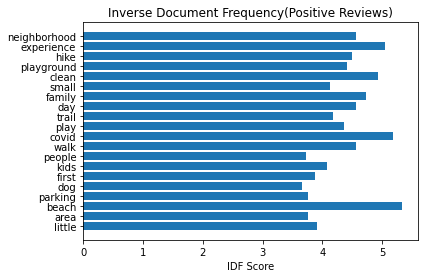

In [46]:
plt.barh(top20_words_pos, IDF_weights_pos)
plt.title('Inverse Document Frequency(Positive Reviews)');
plt.xlabel('IDF Score');

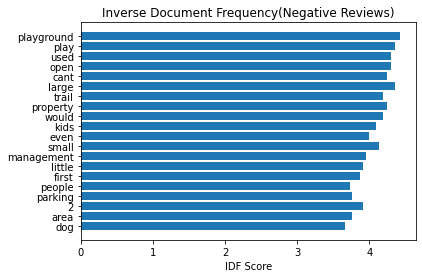

In [47]:
plt.barh(top20_words_neg, IDF_weights_neg)
plt.title('Inverse Document Frequency(Negative Reviews)');
plt.xlabel('IDF Score');

Next, let's take a look at the words with the highest inverse document frequency. These words may not have shown up in the top 20 due to the large number of what were effectively stop words('large', 'would', etc.).

In [63]:
inds_pos = np.argsort(tfidf.idf_)[::-1][:10]
top_IDF_tokens_pos = [list(tfidf.vocabulary_)[ind] for ind in inds]
top_IDF_scores_pos = tfidf.idf_[inds]

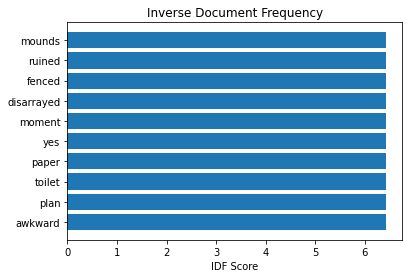

In [61]:
plt.barh(top_IDF_tokens_pos, top_IDF_scores_pos)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

# Ethics & Privacy

Ethics and Privacy are of the utmost importance when conducting a data science project, particularly when the project is being conducted by a government agency. As this project is being conducted in the interest of a public agency, it would be best to err on the side of caution and anonymity with regards to personal information. The names, usernames, and any other personal information from the people who made reviews was removed from the data before any analysis was done. The only information that could be traced back to a particular user was the review itself. However, Yelp's privacy policy covers this sort of issue:

    "Public Content: The information that you post to the Site is intended for public consumption, including your reviews, tips, photos, check-ins, comments, likes, Talk posts, bookmarks, friends, lists, compliments, and account profile. We may display this information on the Site, share it with businesses, and further distribute it to a wider audience through third party sites and services"(yelp.com).

Because the review was posted to Yelp publicly and the user agreed to Yelp's terms of service, the data is available to the public. Even with this in mind, the data analysis done in this project does not concern itself with the specifics of each review, instead it tokenizes the words and looks for trends in frequency of specific terms and shot phrases. Therefore, any kind of publicly available report on this study would not contain any data that could be traced back to an individual.

With this in mind, privacy and ethics are not synonymous. The most private data science exploration could still be unethical in its intentions or implementation. The project at hand, however, is not malicious or unethical in the slightest. The purpose of this analysis was to organize and analyze data in an effort to provide better parks for residents of San Diego and visitors. Using data to make more informed decisions about allocation of funds will contribute to better parks as well as more efficient use of tax revenue from San Diegans. Better parks would presumably increase tourism, help small businesses, and create places for people to enjoy.


# Conclusion & Discussion

Using Yelp reviews to ascertain the points of interest of parks in San Diego proved to be a moderately useful analysis. It is clear further data collection is required and more complex analysis is necessary in order to gain enough information about how to best use resources to improve San Diego parks. With regards to what went well in this analysis, I think that determining the frequency of terms in the Yelp reviews yielded some useful directions that further research look follow. we saw from the positive review frequencies that "dog", "trail", "hike", and "clean" were in a significant number of reviews. On the other side, we saw that "parking", "playground", "management", and "trail" came up often in negative reviews. One could search a little further down the list and perhaps take some more time to eliminate the effective stopwords like "even" and "people" that may not merit consideration in planning a parks budget.

With an understanding of how this analysis went, I have a number of ideas for how to improve this analysis and build on it in the future. Because I am still not very comfortable with Python, I spent a great deal of time dealing with bugs, going through tutorials from class, and reading documentation for pandas, scikitlearn, and nltk, so I wasn't able to dig as deep into the data as I would have liked to. In the future, I would like to revisit this project and delve a little deeper into the analysis I was doing on TF-IDF for the dataset. I would like to compare the reviews not only to each other, but to a wider dataset of yelp review text. I believe a deeper exploration in this area would help me weed out some of the terms that were not useful to an analysis. Additionally, I would have liked to have been able to spend more time parsing through the collocation data. I would like to eliminate the pairs and triplets that contain only stopwords and I would also like to figure out a way to rank them against one another. Perhaps some more time spent reading the documentation from nltk could help with this. 

Overall, I feel that my hypothesis was somewhat supported, though not to the degree that I would have hoped. I was able to find frequencies of words and phrases that may indicate trends in the public's general priorities when it comes to parks. This alone, however, is not enough information to use in fiscal decision-making for a government agency. If conducting this analysis for the San Diego Parks and Recreation department, I would consider this more of an exploratory analysis to help inform topics for future data science projects in the department. The next steps would be to conduct more specific analysis on the topics that came up frequently in this study. One might consider looking at data from other parks departments across the country that had success in the areas discovered here. While this analysis doesn't provide a specific budget plan for the SD Parks and Recreation Department, there is certainly value in ascertaining the priorities of the public and getting a head start on future data science projects.
